In [250]:
import warnings
warnings.filterwarnings('ignore')

In [251]:
#%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [ ]:
# list of US States
df_list =[]
states = ["AL","AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA",
         "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
         "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
         "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
         "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

# list of parameters to pass to the URL
data = [r"acceptance-rate", r"tuition", r"graduation-rate", r"sat-act-scores", r"student-population"]

#lopping through state and parameters to fetch the data
for st in states:
    for dt in data:
        #contructing the URL
        url = f"https://www.collegetuitioncompare.com/compare/tables/?state={st}&factor={dt}"
        #scrapping the url using pandas
        response = pd.read_html(url)
        df_list.append(response)
        
len(df_list)

In [ ]:
# Extracting Dataframes into lists
Acceptance = []
Tuition = []
Graduation = []
SAT_ACT = []
Students_pop = []

#looping through the liast of the dataframes
for i in range (0,255,5):
    Acceptance.append(df_list[i][0])
    Tuition.append(df_list[i+1][0])
    Graduation.append(df_list[i+2][0])
    SAT_ACT.append(df_list[i+3][0])
    Students_pop.append(df_list[i+4][0])
    
#Adding State Column to each dataframe
for i in range(len(states)):
    Acceptance[i]["State"] = states[i]
    Tuition[i]["State"] = states[i]
    Graduation[i]["State"] = states[i]
    SAT_ACT[i]["State"] = states[i]
    Students_pop[i]["State"] = states[i]   

In [ ]:
# Conctinating Dataframes from my lists
Acceptance_df = pd.concat(Acceptance)
Tuition_df =  pd.concat(Tuition)
Graduation_df = pd.concat(Graduation)
SAT_ACT_df = pd.concat(SAT_ACT)
Students_pop_df = pd.concat(Students_pop)

In [252]:
#Target Universities
Target_Univ = ["Florida International University  Miami, FL", "Florida State University  Tallahassee, FL",
               "University of Central Florida  Orlando, FL",
               "University of Florida  Gainesville, FL",
               "University of South Florida-Main Campus  Tampa, FL"]

In [253]:
# Creating Formatting Function
def Top_Univ(df):
    df = df.loc[df['State'] == "FL"]
    df = df.loc[df['School Name'].str.replace(" ", "").isin([x.replace(" ", "") for x in Target_Univ])]
    df.insert (0, "School Abreviation", ["FIU", "FSU", "UCF", "UF", "USF"])
    df.index = [0,1,2,3,4]
    c1 = df.columns[-1]
    column_arrang = df.columns.insert(0, c1)
    df = df[column_arrang]
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [254]:
# Creating a function that generate scatter plot
def Plot(p1, p2):
    fig, ax = plt.subplots(figsize=(7,5))
    # Scatter Plot of Data using Seaborn
    
    plt.scatter(p1, p2, alpha=0.5)
    sns.regplot(p1, p2, color = "r")
    plt.title(f"{p1.name} vs {p2.name}")
    #plt.legend()
    fig.savefig(f'{p1.name}_{p2.name}.png', dpi=100)    
    return plt.show()

In [285]:
#BarPlot function for PLotting target per target university
def BarPlot(df, target):
    fig, ax = plt.subplots()
    x_axis = [x for x in range(len(df["State"]))]
    clrs = ['b' if (x < df[target].max()) else 'r' for x in df[target]]
    ax = df[target].plot(kind = "bar", color = clrs, figsize = (20,5))
    plt.xticks(x_axis, df["School Name"], rotation=5)
    
    # Adding tick bars on the bar Graph
    bars = ax.patches
    for bar, value in zip(bars,df[target]):
        if "Rate" in target:
            s = f"{int(round(value))}%"
        else :
            s = f"{int(round(value))}"
        ax.text(bar.get_x() + bar.get_width() / 2, y = bar.get_height()+1, s= s, color = "b",
                ha='center', va='bottom', fontsize = 16)

    plt.title(f"{target} by Target University", fontsize = 18, color = "k")
    ax.set_xlabel("Universities", fontsize = 16)
    ax.set_ylabel(f"{target}", fontsize = 16)
    ax.set_ylim(0,df[target].max()+df[target].max()*.1)
    fig.savefig(f'{target}_by_Univ.png')
    return plt.show()

In [286]:
#Formatting Florida SAT_ACT df and extracting target univesities
ACT_SAT = pd.DataFrame(pd.read_csv("data/SAT_ACT.csv"))

ACT_SAT = ACT_SAT.replace('-',0)
ACT_SAT.drop(ACT_SAT.head().columns[[0,1]], axis = 1, inplace = True)
for column in ACT_SAT.columns[2:-1] :
    ACT_SAT[column] = ACT_SAT[column].str.rstrip('(MT only), (CM O, (MTEN').str.replace(',', '').fillna(0).astype('int')
Avg_ACT_SAT = ACT_SAT.groupby('State').mean().reset_index()

target_ACT_SAT = Top_Univ(ACT_SAT)
target_ACT_SAT.head()

,State,School Abreviation,School Name,Required to Apply,SAT 25% Percentile,SAT 75% Percentile,ACT 25% Percentile,ACT 75% Percentile
0,FL,FIU,"Florida International University Miami, FL",Required,1090,1260,65,80
1,FL,FSU,"Florida State University Tallahassee, FL",Required,1200,1350,76,90
2,FL,UCF,"University of Central Florida Orlando, FL",Required,1160,1340,71,86
3,FL,UF,"University of Florida Gainesville, FL",Required,1280,1440,79,96
4,FL,USF,University of South Florida-Main Campus Tampa...,Required,1170,1330,72,88


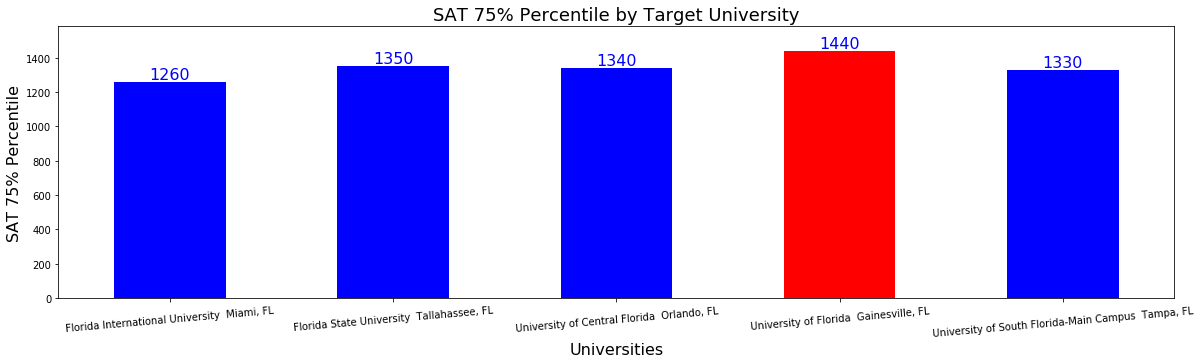

In [305]:
#Plotting SAT 75% percentile scores per University
BarPlot(target_ACT_SAT, "SAT 75% Percentile")

In [306]:
#Formatting Graduation Table
Graduation = pd.DataFrame(pd.read_csv("data/Graduation.csv"))
Graduation = Graduation.replace('-',0)
Graduation.drop(Graduation.columns[[0,1]], axis = 1, inplace = True)
for column in Graduation.columns[1:-1] :
    Graduation[column] = Graduation[column].str.strip('%').str.replace(',','').fillna(0).astype('float')
target_graduation = Top_Univ(Graduation)

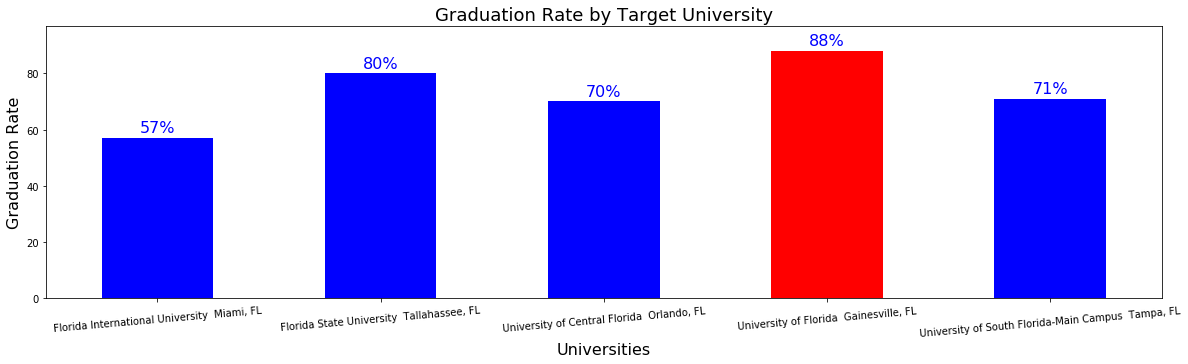

In [307]:
#Plotting Graduation Rate per University
BarPlot(target_graduation, "Graduation Rate")

In [308]:
#Formatting Tuition df
Tuition = pd.DataFrame(pd.read_csv("data/Tuition.csv"))
Tuition = Tuition.drop(0)
Tuition = Tuition.replace('-',0)
Tuition.drop(Tuition.columns[[0,1]], axis = 1, inplace = True)
for column in Tuition.columns[1:-1] :
    Tuition[column] = Tuition[column].str.strip('$, ').str.replace(',','').fillna(0).astype('float')
target_tuition = Top_Univ(Tuition)

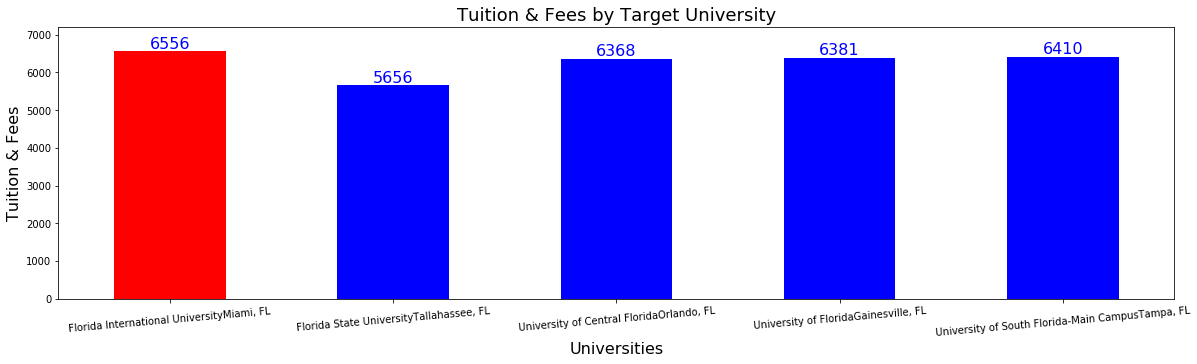

In [309]:
#Plotting Tuition & Fees per University
BarPlot(target_tuition, "Tuition & Fees")

In [310]:
#Formatting Acceptance Table
Accept = pd.DataFrame(pd.read_csv("data/Acceptance.csv"))
Accept.drop(Accept.columns[[0,1]], axis = 1, inplace = True)
for column in Accept.columns[1:-1] :
    try:
        Accept[column] = [round(float(x.strip("$,%")),2) for x in Accept[column]]
    except:
        pass
target_acceptance = Top_Univ(Accept)

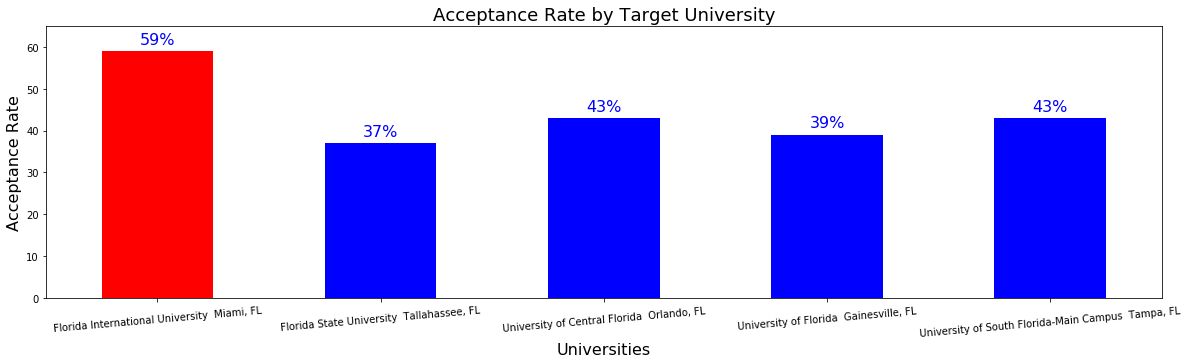

In [311]:
#Plotting Acceptance Rate per University
BarPlot(target_acceptance, "Acceptance Rate")

In [312]:
#Formatting Acceptance Table
Student_p = pd.DataFrame(pd.read_csv("data/Students_pop.csv"))
Student_p.drop(Student_p.columns[[0,1]], axis = 1, inplace = True)
for column in Student_p.columns[1:-1] :
    try:
        Student_p[column] = [round(float(x.strip("$,%")),2) for x in Student_p[column]]
    except:
        pass
target_studentP = Top_Univ(Student_p)

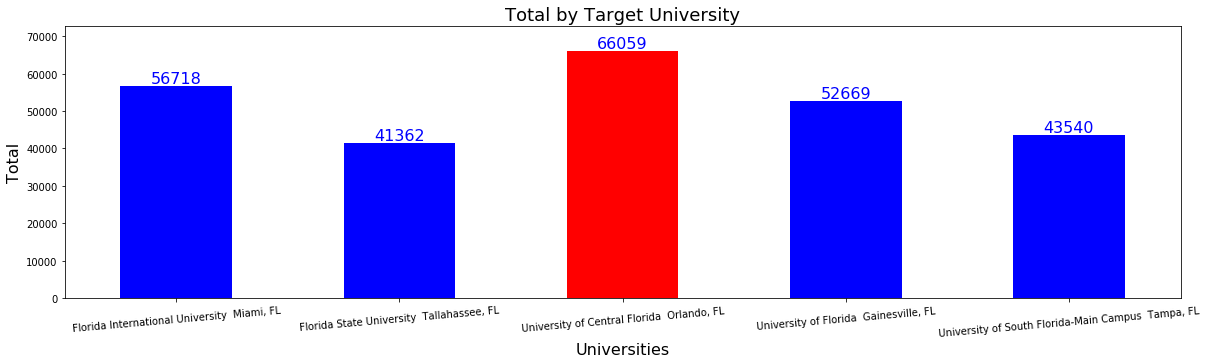

In [313]:
#Plotting student population per University
BarPlot(target_studentP, "Total")

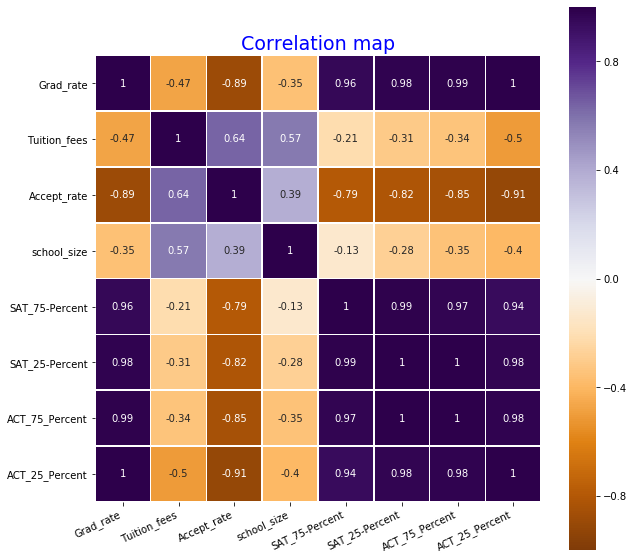

In [314]:
# Genrating new table with all my parameters
Grad_rate = target_graduation["Graduation Rate"]
Tuition_fees = target_tuition["Tuition & Fees"]
Accept_rate = target_acceptance["Acceptance Rate"]
school_size = target_studentP["Total"]
SAT_75_Percent = target_ACT_SAT["SAT 75% Percentile"]
SAT_25_Percent = target_ACT_SAT["SAT 25% Percentile"]
ACT_75_Percent = target_ACT_SAT["ACT 75% Percentile"]
ACT_25_Percent = target_ACT_SAT["ACT 25% Percentile"]

#Creating Table with target attributes
target_table = pd.DataFrame({"Grad_rate":Grad_rate,
                             "Tuition_fees":Tuition_fees,
                             "Accept_rate":Accept_rate,
                             "school_size":school_size,
                             "SAT_75-Percent":SAT_75_Percent,
                             "SAT_25-Percent":SAT_25_Percent,
                            "ACT_75_Percent":ACT_75_Percent,
                            "ACT_25_Percent":ACT_25_Percent})

#Plotting correlation heat map
fig, ax = plt.subplots(figsize=(10,10))

corr = target_table.corr()
ax = sns.heatmap(corr,annot=True, square=True, vmin=-1, vmax=1, center=0, linewidths=.5, cmap='PuOr')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
ax.set_ylim(8.0, 0)
plt.title("Correlation map", fontsize = 19, color ="b")
fig.savefig('heatmap.png')
plt.show()

In [315]:
corr.style.highlight_min(axis=0)
#corr.style.highlight_max(axis=0)

,Grad_rate,Tuition_fees,Accept_rate,school_size,SAT_75-Percent,SAT_25-Percent,ACT_75_Percent,ACT_25_Percent
Grad_rate,1,-0.472582,-0.88895,-0.352404,0.957087,0.983989,0.986383,0.99806
Tuition_fees,-0.472582,1,0.635124,0.572346,-0.213453,-0.310595,-0.342382,-0.503866
Accept_rate,-0.88895,0.635124,1,0.390248,-0.791325,-0.819861,-0.850394,-0.908264
school_size,-0.352404,0.572346,0.390248,1,-0.129002,-0.276493,-0.34845,-0.397702
SAT_75-Percent,0.957087,-0.213453,-0.791325,-0.129002,1,0.987771,0.974044,0.941863
SAT_25-Percent,0.983989,-0.310595,-0.819861,-0.276493,0.987771,1,0.995345,0.975071
ACT_75_Percent,0.986383,-0.342382,-0.850394,-0.34845,0.974044,0.995345,1,0.983257
ACT_25_Percent,0.99806,-0.503866,-0.908264,-0.397702,0.941863,0.975071,0.983257,1


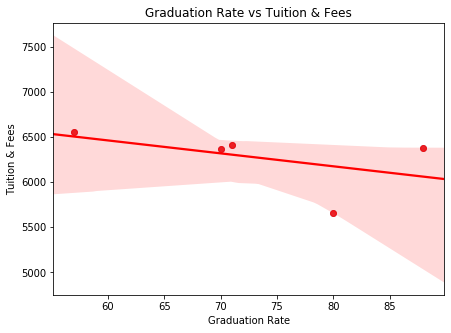

In [316]:
Plot(Grad_rate, Tuition_fees)

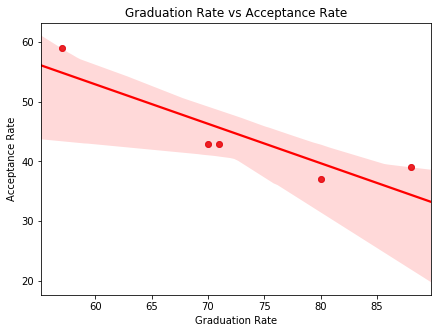

In [317]:
Plot(Grad_rate, Accept_rate)

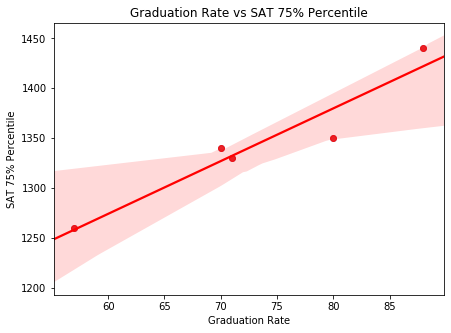

In [318]:
Plot(Grad_rate, SAT_75_Percent)

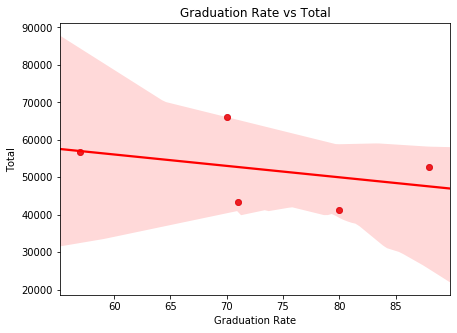

In [319]:
Plot(Grad_rate, school_size)

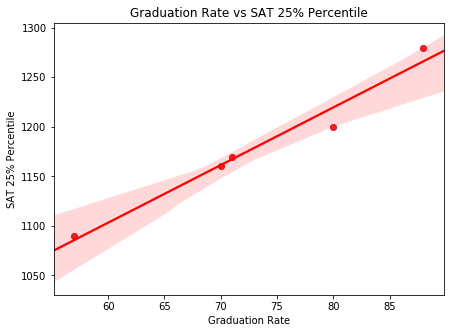

In [320]:
Plot(Grad_rate, SAT_25_Percent)


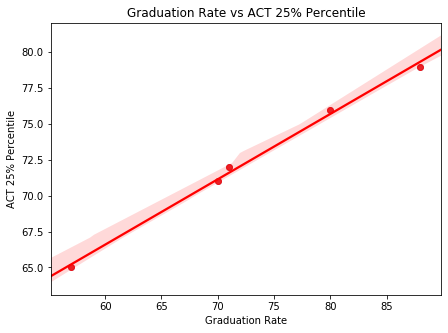

In [321]:
Plot(Grad_rate, ACT_25_Percent)

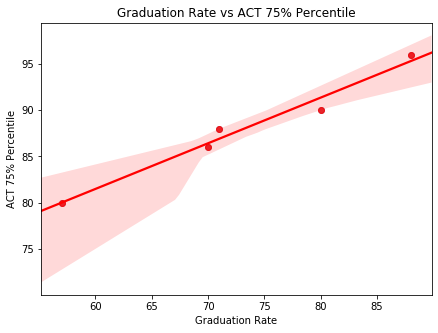

In [322]:
Plot(Grad_rate, ACT_75_Percent)